# <center>SFML/INFO-F422: Statistical foundations of machine learning</center>

# <center>Regression Part</center>

Name: Mathieu Parmentier & Nini

Python version: 3.6

Date: XXXXX


## Introduction

THe curse of dimentionality is a term invented in 1961 by R.Bellman that refer to the fact that as a number of features or dimensions grows, the amount of data needed to generalize accurately a model groth exponentially.


# Objective and strategy 

## Material and method

### Boston home data set: (pour le lire, il ne faut pas faire tourner le data set synthetique)

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

data = datasets.load_boston()
X = np.array(data.data)
Y = np.array(data.target)
label =data.feature_names

Exploration of the data

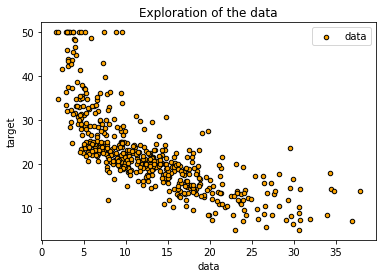

In [2]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")

plt.xlabel("data")
plt.ylabel("target")
plt.title("Exploration of the data")
plt.legend()
plt.show()

### Synthetic data set:

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
# import pandas as pd

np.random.seed(0)
# mettre une seed
rng = np.random.RandomState(0)
X, Y = make_regression(n_samples=1000, n_features=1, n_informative=1, random_state=rng,noise=100)
# function of type: y = f(x)

Exploration of the synthetic data

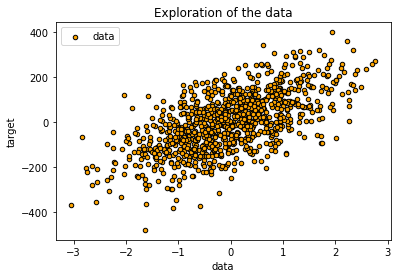

In [40]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")

plt.xlabel("data")
plt.ylabel("target")
plt.title("Exploration of the data")
plt.legend()
plt.show()

Building of the training set and test set

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 25)

### 1) Algorithm : Support vector machine (SVM)  → source: adaptation du cours et de scikit learn

code

In [18]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
#svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)

svr_rbf.fit(x_train,y_train)
svr_lin.fit(x_train,y_train)
#svr_poly.fit(x_train,y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Score

In [23]:
#Computation of E in and E out
E_in_svr_rbf = svr_rbf.score(x_train, y_train)
E_out_svr_rbf = svr_rbf.score(x_test, y_test)

E_in_svr_lin = svr_lin.score(x_train, y_train)
E_out_svr_lin = svr_lin.score(x_test, y_test)

#cross validation of the model with cv = 5
from sklearn.model_selection import cross_val_score
cv_scores_svr_rbf = cross_val_score(svr_rbf, X, Y, cv=5)
cv_scores_svr_lin = cross_val_score(svr_lin, X, Y, cv=5)

#print the cross validation score and average
print("cv_scores_svr_rbf :",cv_scores_svr_rbf)
print("cross validation mean score for svr_rbf :",np.mean(cv_scores_svr_rbf))
print("cv_scores_svr_lin :",cv_scores_svr_lin)
print("cross validation mean score for svr_lin :",np.mean(cv_scores_svr_lin))

cv_scores_svr_rbf : [0.41240417 0.36928636 0.38304207 0.42176838 0.37479674]
cross validation mean score for svr_rbf : 0.3922595444196627
cv_scores_svr_lin : [0.41727945 0.37270866 0.39084217 0.42239667 0.36798021]
cross validation mean score for svr_lin : 0.39424143250997


Plot of the results

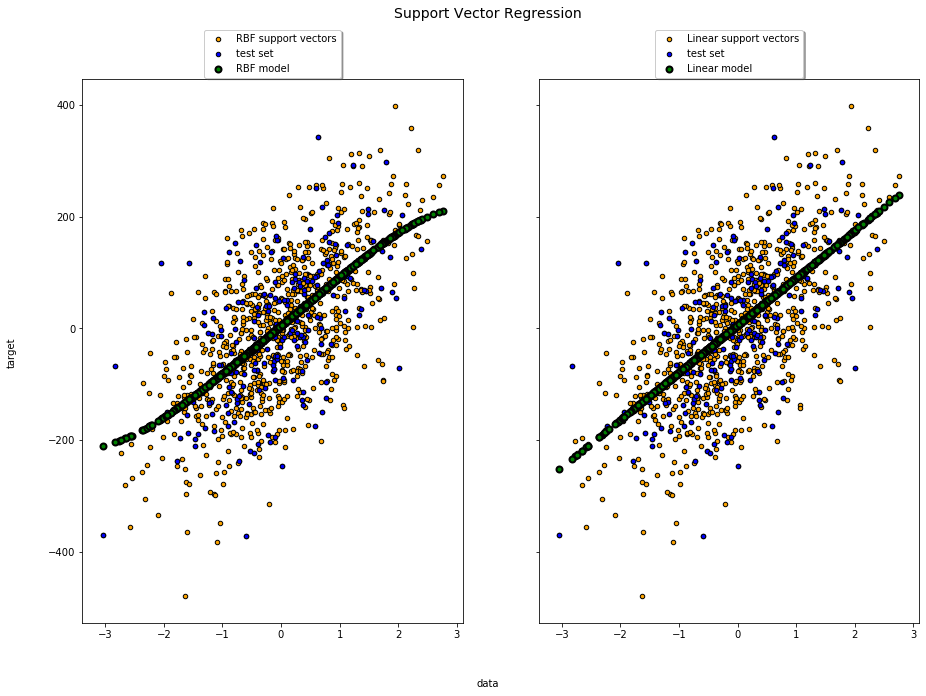

In [25]:
lw = 2

svrs = [svr_rbf, svr_lin]
kernel_label = ['RBF', 'Linear']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].scatter(X[:,:1], Y, edgecolor="black",color="orange", s=20,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(x_test[:,:1], y_test, edgecolor="black", color="blue", s=20,
                     label='test set')
    axes[ix].scatter(X[:,:1], svr.predict(X), edgecolor="black", color="green", lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### 2) Algorithm : Decision Tree Regression  → source: adaptation du cours et de scikit learn

code

In [26]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

DTR = DecisionTreeRegressor(max_depth=2)
DTR.fit(x_train, y_train)
# Y_pred = regressor.predict(X_test)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

score

In [32]:
#Computation of E in and E out
E_in_DTR = DTR.score(x_train, y_train)
E_out_DTR = DTR.score(x_test, y_test)

#cross validation of the model with cv = 5
from sklearn.model_selection import cross_val_score
cv_scores_DTR = cross_val_score(DTR, X, Y, cv=5)

#print the cross validation score and average
print("cv_scores_DTR :",cv_scores_DTR)
print("cross validation mean score for DTR :",np.mean(cv_scores_DTR))

cv_scores_DTR : [0.33399503 0.31919749 0.35083242 0.38294609 0.34590391]
cross validation mean score for DTR : 0.3465749869062621


Plot of the results

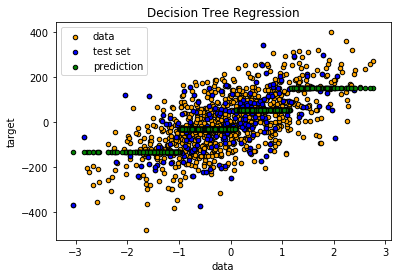

In [28]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")
plt.scatter(x_test[:,:1], y_test, s=20, edgecolor="black",c="blue", label="test set")
plt.scatter(X[:,:1], DTR.predict(X), s=20, edgecolor="black",c="green", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### 3) Algorithm : Neural network Regression  → source: de scikit learn

code

In [30]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

NNR = MLPRegressor(random_state=1, max_iter=1000)
NNR.fit(x_train, y_train)

C:\Anaconda\envs\Python Scripts\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

score

In [31]:
#Computation of E in and E out
E_in_NNR = NNR.score(x_train, y_train)
E_out_NNR = NNR.score(x_test, y_test)

#cross validation of the model with cv = 5
from sklearn.model_selection import cross_val_score
cv_scores_NNR = cross_val_score(NNR, X, Y, cv=5)

#print the cross validation score and average
print("cv_scores_NNR :",cv_scores_NNR)
print("cross validation mean score for NNR :",np.mean(cv_scores_NNR))

C:\Anaconda\envs\Python Scripts\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\envs\Python Scripts\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\envs\Python Scripts\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\envs\Python Scripts\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't conver

cv_scores_NNR : [0.40772705 0.36620468 0.38411261 0.41347415 0.37356597]
cross validation mean score for NNR : 0.3890168933525707


C:\Anaconda\envs\Python Scripts\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Plot of the results

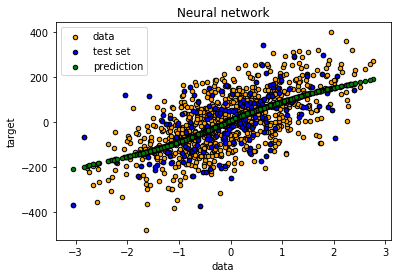

In [34]:
plt.figure()
plt.scatter(X[:,:1], Y, s=20, edgecolor="black",c="orange", label="data")
plt.scatter(x_test[:,:1], y_test, s=20, edgecolor="black",c="blue", label="test set")
plt.scatter(X[:,:1], NNR.predict(X), s=20, edgecolor="black",c="green", label="prediction")

plt.xlabel("data")
plt.ylabel("target")
plt.title("Neural network")
plt.legend()
plt.show()

### 4) Algorithm : Nearest neighbors regression  → source: de scikit learn

code

In [36]:
from sklearn import neighbors

n_neighbors = 5

knn_uniform = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knn_distance = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')

knn_uniform.fit(x_train, y_train) 
knn_distance.fit(x_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

score

In [41]:
#Computation of E in and E out
E_in_knn_uniform = knn_uniform.score(x_train, y_train)
E_out_knn_uniform = knn_uniform.score(x_test, y_test)

E_in_knn_distance = knn_distance.score(x_train, y_train)
E_out_knn_distance = knn_distance.score(x_test, y_test)

#cross validation of the model with cv = 5
from sklearn.model_selection import cross_val_score
cv_scores_knn_uniform = cross_val_score(knn_uniform, X, Y, cv=5)
cv_scores_knn_distance = cross_val_score(knn_distance, X, Y, cv=5)

#print the cross validation score and average
print("cv_scores_knn_uniform :",cv_scores_knn_uniform)
print("cross validation mean score for knn_uniform :",np.mean(cv_scores_knn_uniform))
print("cv_scores_knn_distance :",cv_scores_knn_distance)
print("cross validation mean score for knn_distance :",np.mean(cv_scores_knn_distance))

cv_scores_knn_uniform : [0.19596371 0.21836062 0.29282516 0.34680809 0.242417  ]
cross validation mean score for knn_uniform : 0.2592749138426595
cv_scores_knn_distance : [0.1198986  0.16980987 0.15931195 0.19144239 0.12883247]
cross validation mean score for knn_distance : 0.1538590578782934


Plot of the results

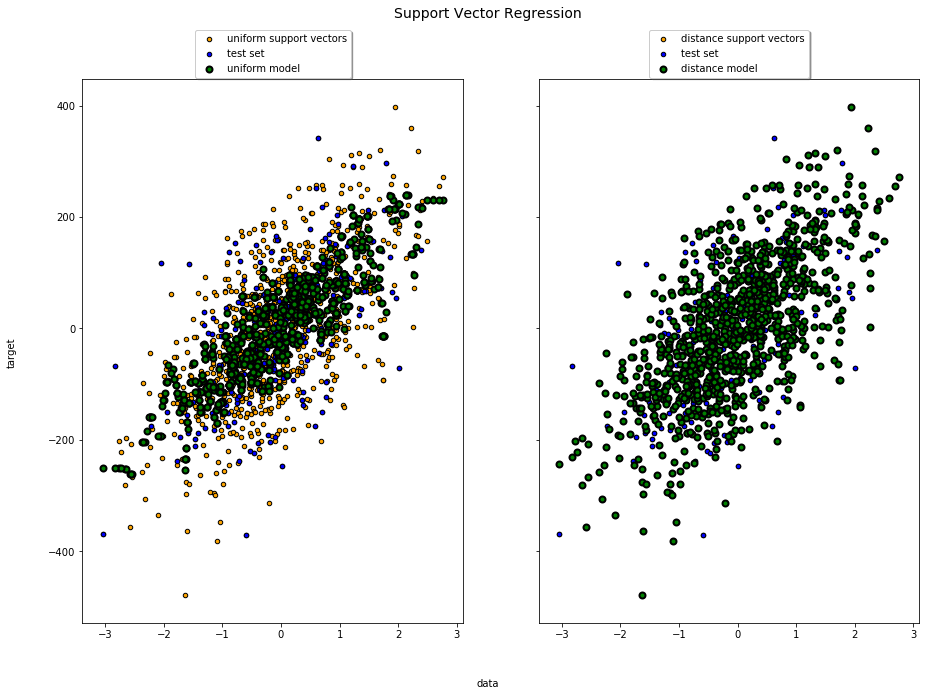

In [39]:
lw = 2

knn = [knn_uniform, knn_distance]
kernel_label = ['uniform', 'distance']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, knn in enumerate(knn):
    axes[ix].scatter(X[:,:1], Y, edgecolor="black",color="orange", s=20,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(x_test[:,:1], y_test, edgecolor="black", color="blue", s=20,
                     label='test set')
    axes[ix].scatter(X[:,:1], knn.predict(X), edgecolor="black", color="green", lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Results & Discusion

!!!!!!!!!!!!!! à faire tableau récapitulatif des résultats !!!!!!!!

## Conclusion 

## Bibliography

 Lecture + ...